In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [20]:
## import dataset
df = pd.read_csv('./data/exoplanets-clean.csv')

null_col_vals = df.isnull().sum().to_dict()
NUM_ROWS = df.shape[0]

thresholdAmount = 0.3 * NUM_ROWS

dropped = []
for key in null_col_vals:
    if(null_col_vals[key] >= thresholdAmount):
        dropped.append(key)

df = df.drop(columns=dropped, axis=1)
df = df.dropna()
df.head()
df.dtypes

num_stars                    int64
single_planet_exosystem       bool
discoverymethod             object
disc_year                    int64
disc_facility               object
                            ...   
sy_kmagerr1                float64
sy_kmagerr2                float64
sy_gaiamag                 float64
sy_gaiamagerr1             float64
sy_gaiamagerr2             float64
Length: 63, dtype: object

In [21]:
df['single_planet_exosystem'] = df['single_planet_exosystem'].map({True: 'Yes', False: 'No'})

single_planet_exosystem_Yes
True     1674
False    1408
Name: count, dtype: int64
single_planet_exosystem_Yes
True     54.31538
False    45.68462
Name: count, dtype: float64


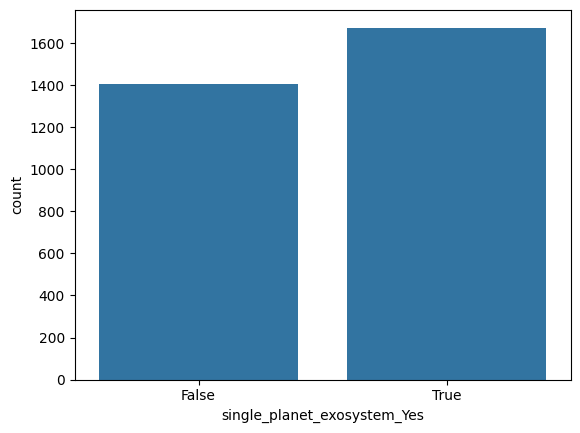

In [22]:
df_obj = df.select_dtypes(include='object')
df_obj.head()

df_obj= pd.get_dummies(df_obj, drop_first=True)
df_obj.head()
print(df_obj['single_planet_exosystem_Yes'].value_counts())
print( (df_obj['single_planet_exosystem_Yes'].value_counts()/ df_obj['single_planet_exosystem_Yes'].value_counts().sum()) * 100)
sns.countplot(data=df_obj, x='single_planet_exosystem_Yes')

dictMethod = {}
count = 0
for value in df['discoverymethod']:
    if value not in dictMethod:
        dictMethod[value] = count
        count+=1
df['discoverymethod'] = df['discoverymethod'].map(dictMethod)

dictFac = {}
count2 = 0
for value in df['disc_facility']:
    if value not in dictFac:
        dictFac[value] = count2
        count2+=1
df['disc_facility'] = df['disc_facility'].map(dictFac)

#df['single_planet_exosystem'] = df['single_planet_exosystem'].map({True: 0, False: 1})

dictBmass = {}
count3 = 0
for value in df['pl_bmassprov']:
    if value not in dictBmass:
        dictBmass[value] = count3
        count3+=1
df['pl_bmassprov'] = df['pl_bmassprov'].map(dictBmass)

dictMratio = {}
count4 = 0
for value in df['st_metratio']:
    if value not in dictMratio:
        dictMratio[value] = count4
        count4+=1
df['st_metratio'] = df['st_metratio'].map(dictMratio)


In [58]:
#using the 16 most signifigant features from random forest as the features - all over .02 feature score
attr = df[['disc_year', 'st_loggerr1', 'st_loggerr2', 'pl_bmassj', 'pl_radj', 'st_meterr1', 'st_raderr2', 'pl_rade', 'st_meterr2', 'pl_bmasse', 'sy_dist', 'pl_orbpererr1', 'sy_disterr1', 'pl_orbpererr2', 'st_tefferr1', 'st_metratio']]
target = df['single_planet_exosystem']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=7)

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from C45 import C45Classifier

clf=C45Classifier()
# Train the classifier
clf.fit(attr_train,target_train)
target_pred2 = clf.predict(attr_test)
print(f"\n Accuracy: {accuracy_score(target_test,target_pred2)}  ")

print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test,target_pred2))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred2))


 Accuracy: 0.7610810810810811  

 Confusion Matrix:
[[228 200]
 [ 21 476]]

 Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.53      0.67       428
         Yes       0.70      0.96      0.81       497

    accuracy                           0.76       925
   macro avg       0.81      0.75      0.74       925
weighted avg       0.80      0.76      0.75       925



In [60]:
#using all the columns as features except the target one
attr = df.drop('single_planet_exosystem', axis=1)
target = df['single_planet_exosystem']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=7)

clf=C45Classifier()
# Train the classifier
clf.fit(attr_train,target_train)
target_pred2 = clf.predict(attr_test)
print(f"\n Accuracy: {accuracy_score(target_test,target_pred2)}  ")

print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test,target_pred2))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred2))


 Accuracy: 0.5589189189189189  

 Confusion Matrix:
[[ 23 405]
 [  3 494]]

 Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.05      0.10       428
         Yes       0.55      0.99      0.71       497

    accuracy                           0.56       925
   macro avg       0.72      0.52      0.40       925
weighted avg       0.70      0.56      0.43       925

